In [1]:
%matplotlib inline
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Leitura e limpeza dos dados

In [3]:
wg_data = pd.read_csv('wage_train.csv')
wg_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
wg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
Unnamed: 0        32560 non-null int64
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
yearly_wage       32560 non-null object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
#Trocando os valores ausentes por valores nulos
for col in wg_data.columns:
    for idx, row in enumerate(wg_data[col]):
        if str.strip(str(row)) == '?':
            wg_data.loc[idx, col] = 'Unknown'
#Excluindo os valores nulos
#wg_data = wg_data.dropna()

In [6]:
wg_data.info()
#wg_data.head(29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
Unnamed: 0        32560 non-null int64
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
yearly_wage       32560 non-null object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


# Análise Exploratória

## Quantidade de pessoas por idade

In [7]:
#Verificando os valores da coluna idade, contando o número de pessoas por idade e organizando o índice
idades = wg_data["age"].value_counts()
idades.sort_index()

17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por faixa etária')

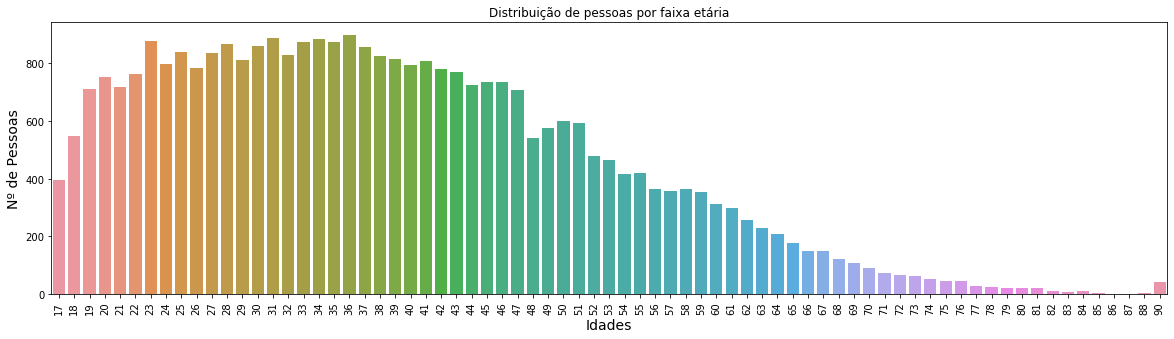

In [8]:
#Representando graficamente o número de pessoas por idade para analisar que idades são mais recorrentes nos dados
FS = 14
g = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=idades.keys(),y=idades.values)
plt.xlabel('Idades', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')

## Agrupando em faixas etárias

Text(0.5, 1.0, 'Distribuição de pessoas por faixa etária')

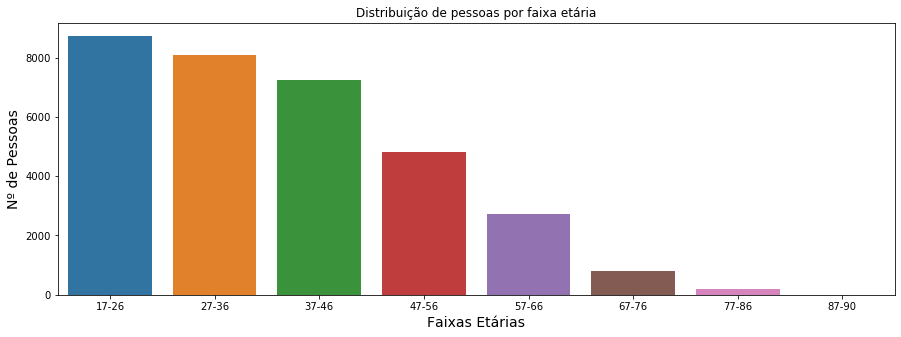

In [9]:
#Representando graficamente o número de pessoas por faixas etárias para analisar qual faixa etária é mais recorrente nos dados
i = 0
faixas_etarias = []
while i < len(idades.values):
    faixas = idades.values[i:i+10]
    #print(faixas, faixas.sum())
    faixas_etarias.append(faixas.sum())
    i=i+10

faixas_etarias
faixas_keys = ['17-26', '27-36', '37-46', '47-56', '57-66', '67-76', '77-86', '87-90']
g = plt.subplots(figsize = (15,5)) 
sns.barplot(x=faixas_keys,y=faixas_etarias)
plt.xlabel('Faixas Etárias', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')

## Agrupando por tipo de trabalho

In [10]:
#Verificando a coluna "Tipo de trabalho" e contando o número de pessoas por categoria, para analisar qual é o tipo de trabalho mais comum nos dados
type_work = wg_data['workclass'].value_counts()
type_work

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
#Agrupando as categorias de "Tipo de trabalho" que estavam muito dispersas e podiam ser representadas em categorias mais amplas
jobs = []
jobs.append(type_work[2]+type_work[4]+type_work[6])
jobs.append(type_work[3]+type_work[7])
jobs.append(type_work[0])
jobs.append(type_work[1]+type_work[5])
jobs_names= ["Gov_Workers", "Unemployed", "Private","Self_Emp"]
#print(jobs)

Text(0.5, 1.0, 'Distribuição de pessoas por tipo de trabalho')

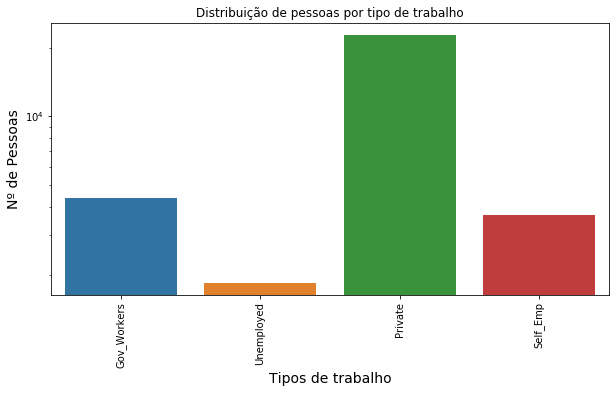

In [12]:
#Representando graficamente o número de pessoas por categorias de "Tipo de trabalho" mais amplas, para facilitar a visualização de qual setor de trabalho abriga mais pessoaas
j = plt.subplots(figsize = (10,5))
plt.xticks(rotation=90)
sns.barplot(x=jobs_names,y=jobs)
plt.yscale('log')
plt.xlabel('Tipos de trabalho', size = 14)
plt.ylabel('Nº de Pessoas', size = 14)
plt.title('Distribuição de pessoas por tipo de trabalho')

In [13]:
wg_data['workclass'] = wg_data['workclass'].str.strip()
wg_data['workclass'] = wg_data['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Gov_Workers')
wg_data['workclass'] = wg_data['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self_Emp')
wg_data['workclass'] = wg_data['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')

In [14]:
wg_data['workclass'].unique()

array(['Self_Emp', 'Private', 'Gov_Workers', 'Unknown', 'Unemployed'],
      dtype=object)

## Quantidade de pessoas por raça/etnia

In [15]:
#Verificando a coluna "Raça" e contando o número de pessoas por categoria, para analisar qual é a raça mais comum nos dados
wg_data['race'] = wg_data['race'].str.strip()
races = wg_data['race'].value_counts()
races

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por raça')

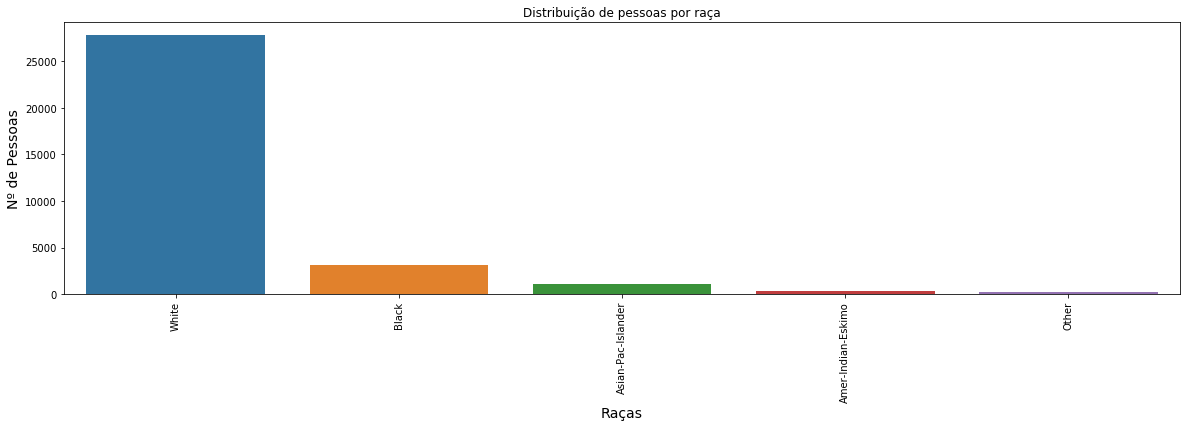

In [16]:
#Representando graficamente o número de pessoas em cada categoria de raça nos dados
r = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=races.keys(),y=races.values)
plt.xlabel('Raças', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por raça')

## Quantidade de pessoas por sexo

In [17]:
#Verificando a coluna "Sexo" e contando o número de pessoas por categoria, para analisar qual é a predominância de sexo nos dados
wg_data['sex'] = wg_data['sex'].str.strip()
genero = wg_data['sex'].value_counts()
genero

Male      21789
Female    10771
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por sexo')

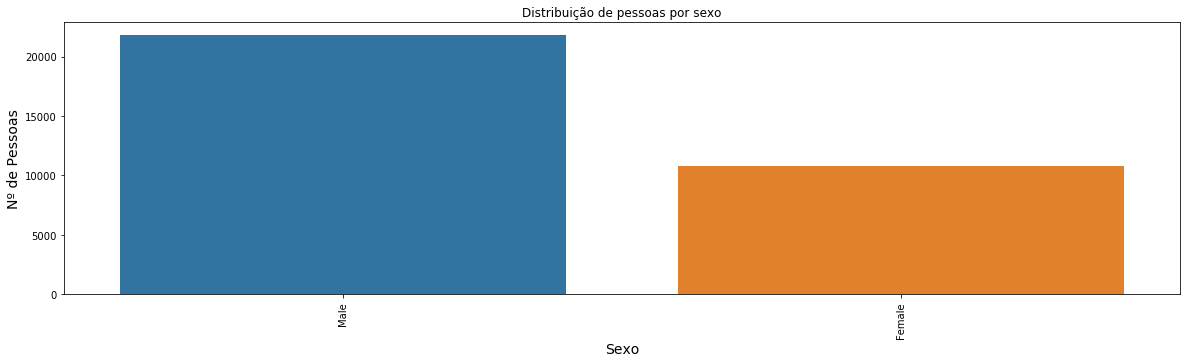

In [18]:
#Representando graficamente o número de pessoas em cada categoria de sexo 
g = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=genero.keys(),y=genero.values)
plt.xlabel('Sexo', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por sexo')

## Agrupando por níveis de escolaridade

In [19]:
#Verificando a coluna "Educação" e contando o número de pessoas por categoria
escolaridade = wg_data['education'].value_counts()
escolaridade

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [20]:
#Agrupando o número de pessoas e nível educacional, que estavam dispersos nas categorias originais, em classes de educação mais amplas p/ facilitar a visualização 
educacao = []
educacao.append(escolaridade[8]+escolaridade[13]+escolaridade[14]+escolaridade[15])
educacao.append(escolaridade[0]+escolaridade[5]+escolaridade[7]+escolaridade[11]+escolaridade[10])
educacao.append(escolaridade[1]+escolaridade[2]+escolaridade[3]+escolaridade[4]+escolaridade[6]+escolaridade[9]+escolaridade[12])
nivel_educacao = ["Pré Escola e Fundamental", "Ens.Médio", "Ens.Superior"]
print(educacao)


[1198, 13556, 17806]


Text(0.5, 1.0, 'Distribuição de pessoas por nível de escolaridade')

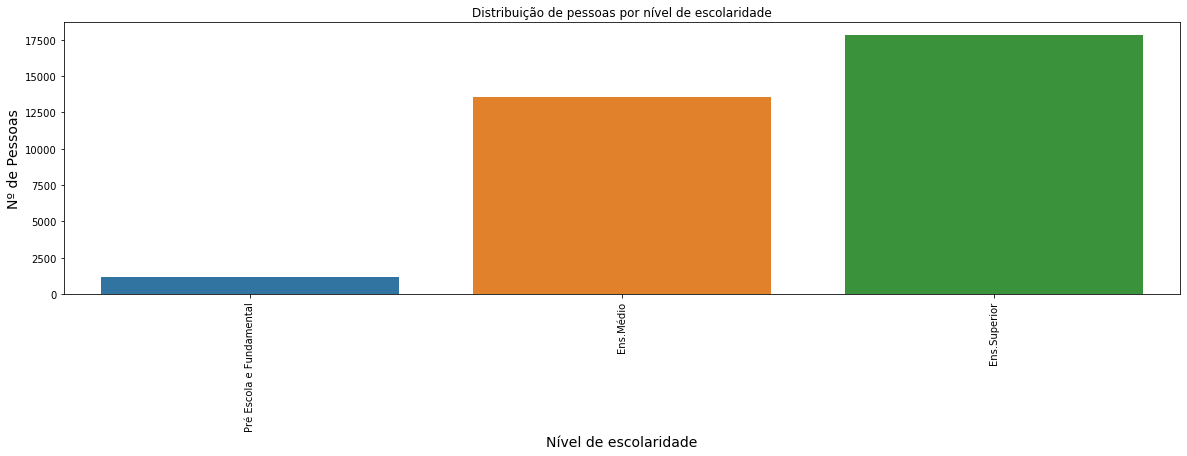

In [21]:
#Representando graficamente o número de pessoas por nível educacional em categorias mais simples
e = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=nivel_educacao,y=educacao)
plt.xlabel('Nível de escolaridade', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por nível de escolaridade')

## Agrupando por ocupação

In [22]:
#Verificando a coluna "Ocupação" e contando o número de pessoas por categoria, para analisar qual é a ocupação mais comum nos dados
wg_data['occupation'] = wg_data['occupation'].str.strip()
ocupacao = wg_data['occupation'].value_counts()
ocupacao

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por ocupação')

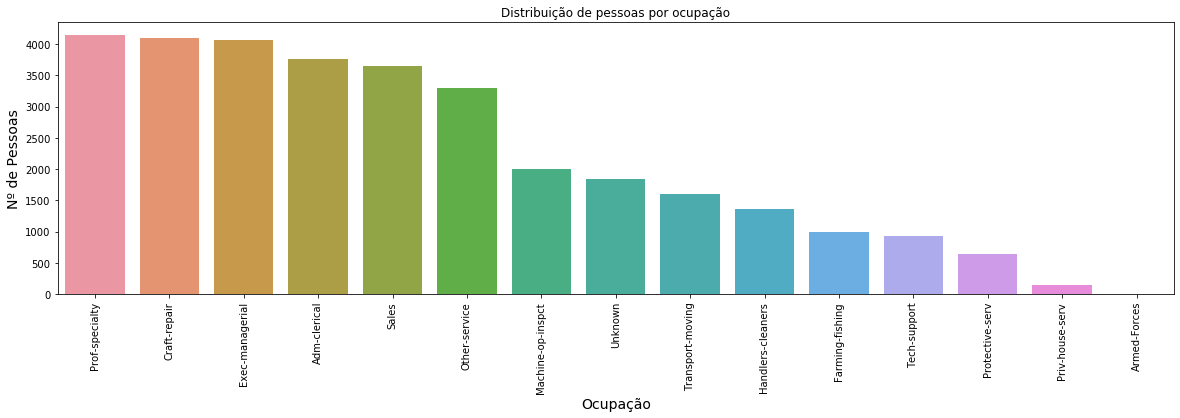

In [23]:
#Representando graficamente o número de pessoas por categoria de ocupação
g = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=ocupacao.keys(),y=ocupacao.values)
plt.xlabel('Ocupação', size = 14)
plt.ylabel('Nº de Pessoas', size = 14)
plt.title('Distribuição de pessoas por ocupação')

## Agrupando por estado civil

In [24]:
#Verificando a coluna "Status Civil" e contando o número de pessoas por categoria, para analisar qual é o status civil mais comum nos dados
est_civil = wg_data['marital_status'].value_counts()
est_civil

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [25]:
#Agrupando o número de pessoas e categorias de status civil, que estavam dispersos nas categorias originais, em classes status civil mais amplas p/ facilitar a visualização 
estado_civil = []
estado_civil.append(est_civil[0]+est_civil[5]+est_civil[6])
#print(estado_civil)
estado_civil.append(est_civil[1])
estado_civil.append(est_civil[2])
estado_civil.append(est_civil[4])
status_civil = ["Casado", "Solteiro", "Divorciado", "Viúvo"]

Text(0.5, 1.0, 'Distribuição de pessoas por estado civil')

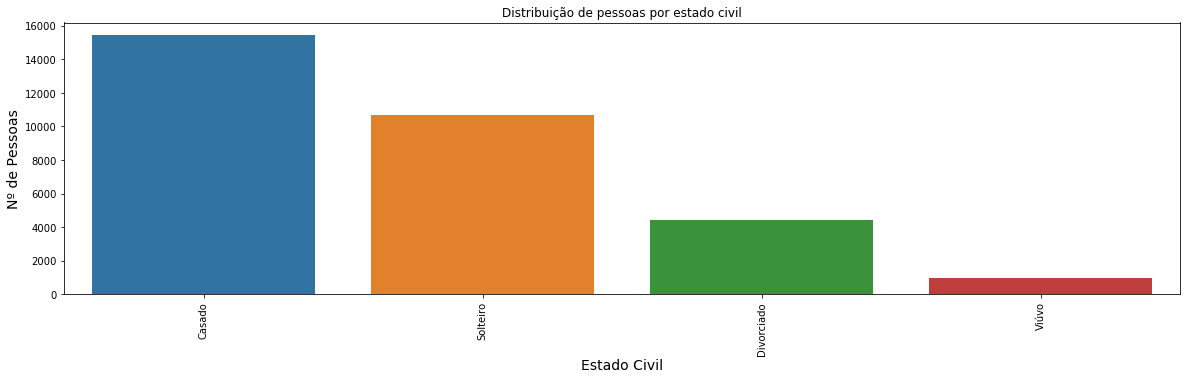

In [26]:
#Representando graficamente o número de pessoas por novas categorias de status civil mais amplas
c = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=status_civil,y=estado_civil)
plt.xlabel('Estado Civil', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por estado civil')

## Agrupando por quantidade de horas semanais trabalhadas

In [27]:
#Verificando a coluna "Horas feitas por Semana" e contando o número de pessoas por categoria, para analisar qual é o valor de horas semanais mais comum nos dados
horas_sem = wg_data['hours_per_week'].value_counts()
horas_sem.sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours_per_week, Length: 94, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por horas semanais de trabalho')

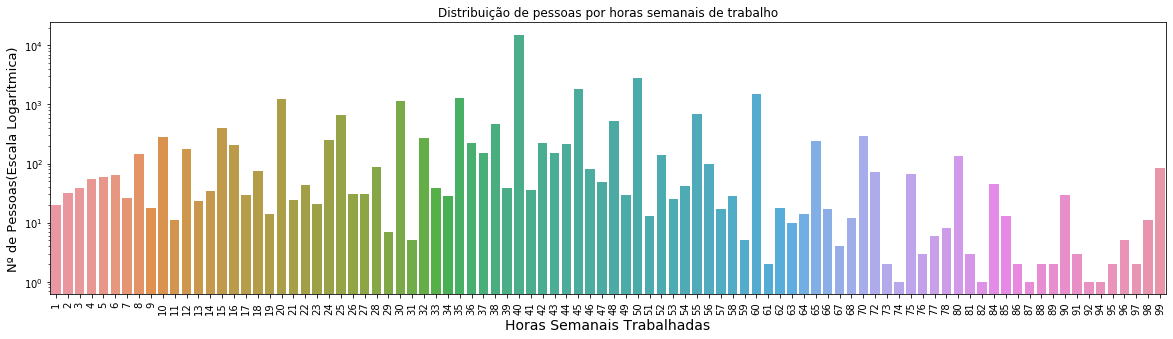

In [28]:
#Representando graficamente o número de pessoas por horas semanais realizadas
h = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
sns.barplot(x=horas_sem.keys(),y=horas_sem.values)
plt.yscale('log')
plt.xlabel('Horas Semanais Trabalhadas', size = FS)
plt.ylabel('Nº de Pessoas(Escala Logarítmica)', size = 13) 
plt.title('Distribuição de pessoas por horas semanais de trabalho')

## Quantidade de pessoas por intervalo de horas semanais

Text(0.5, 1.0, 'Distribuição de pessoas por intervalos de horas semanais de trabalho')

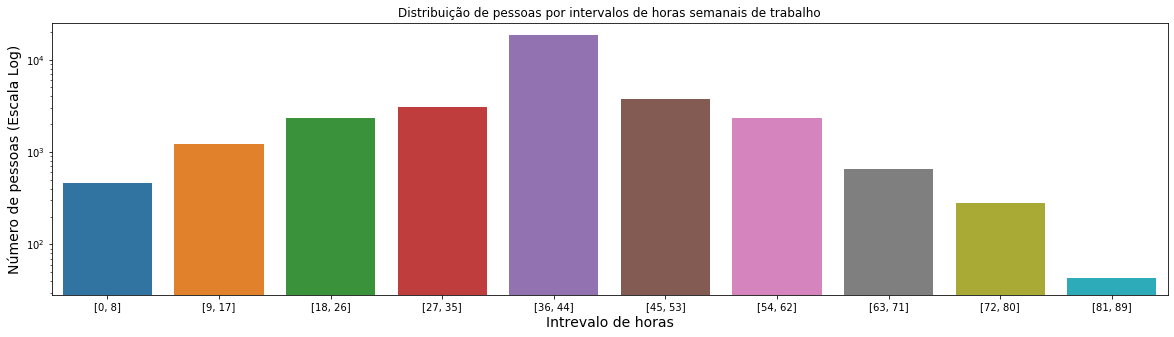

In [29]:
#Agrupando o número de pessoas por horas semanais realizadas em intervalos maiores de horas semanais, para facilitar a visualização pois nos dados originais a categoria de horas semanais contém valores muito dispersos
#font size
FS = 14

n_bins = 10
s_horas = horas_sem.sort_index()
horas_trab = s_horas.keys()#[0]
horas_quant = s_horas.values
#print(int(len(s_horas)/n_bins))
hora_bar = []
hora_label = []
tick_label = []
for i in range(n_bins):
    var_auxiliar = 0
    
    J_f = int(len(s_horas)/n_bins)
    #print((i+1)*J_f)
    for j in range(J_f*i ,(i+1)*J_f):
        var_auxiliar = var_auxiliar + horas_quant[j]
    hora_bar.append(var_auxiliar)
    hora_label.append(J_f*(i+1))
    tick_label.append(str([J_f*i, J_f*(i+1) -1]))


labels = tick_label
h = plt.subplots(figsize = (20,5))
#plt.xticks(rotation=90)

plt.yscale('log')
sns.barplot(x=labels,y=hora_bar)
plt.xlabel('Intrevalo de horas', size = FS)
plt.ylabel('Número de pessoas (Escala Log)', size = FS) 
plt.title('Distribuição de pessoas por intervalos de horas semanais de trabalho')

#h.set_xticklabels(labels)#,rotation='horizontal')

## Quantidade de pessoas por país

In [30]:
#Verificando a coluna "País de Origem" e contando o número de pessoas por categoria, para analisar qual país é mais representativo na amostra
pais = wg_data['native_country'].value_counts()
pais

 United-States                 29169
 Mexico                          643
Unknown                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Distribuição de pessoas por país')

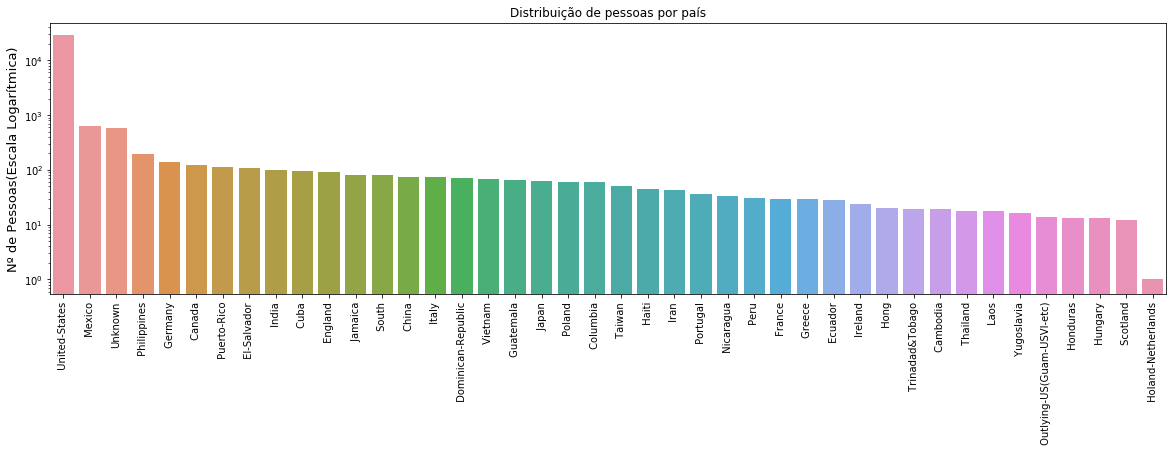

In [31]:
#Representando graficamente a distribuição de pessoas nos dados por países, em escala logarítimica para visualizar melhor os dados que são muito dispersos. 
h = plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(x=pais.keys(),y=pais.values)
#plt.xlabel('Países', size = FS)
plt.ylabel('Nº de Pessoas(Escala Logarítmica)', size = 13) 
plt.title('Distribuição de pessoas por país')

## Quantidade de pessoas e salário anual

In [32]:
#Verificando a coluna "Salário Anual" e contando o número de pessoas que ganham mais ou menos de 50k, para analisar em qual categoria se concentra os dados 
salario_anual = wg_data['yearly_wage'].value_counts()
salario_anual

 <=50K    24719
 >50K      7841
Name: yearly_wage, dtype: int64

Text(0.5, 1.0, 'Distribuição de pessoas por salário anual')

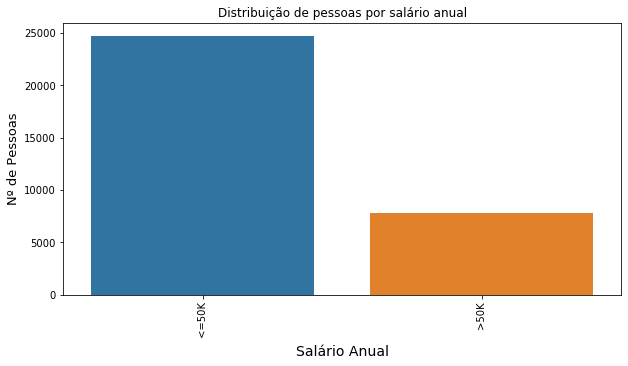

In [33]:
s = plt.subplots(figsize = (10,5))
plt.xticks(rotation=90)
#plt.yscale('log')
sns.barplot(x=salario_anual.keys(),y=salario_anual.values)
plt.xlabel('Salário Anual', size = FS)
plt.ylabel('Nº de Pessoas', size = 13) 
plt.title('Distribuição de pessoas por salário anual')

## Relação escolaridade/salário 
### Essa relação foi pensada para descobrir qual é a influência do grau de escolaridade no fator salário, quis saber se ter um maior grau de escolaridade influenciava no fato de ganhar mais que os demais.

In [34]:
'''
 Convertendo os níveis escolares do dataset em 3 categorias e atualiza a coluna 'education' com as novas categorias
'''
#wg_data = pd.read_csv('wage_train.csv')
escolaridades = wg_data['education']
#print(escolaridades)
escol_aux = []
nivel = ''

for nivel in escolaridades:
    #print(nivel.strip())
    if nivel.strip() == '1st-4th' or nivel.strip() == '5th-6th' or nivel.strip() == '7th-8th' or nivel.strip() == 'Preschool':
        escol_aux.append('Fundamental')
    elif nivel.strip() == 'HS-grad' or nivel.strip() == '9th'or nivel.strip() == '10th' or nivel.strip() == '11th' or nivel.strip() == '12th' or nivel.strip() == 'Prof-school':
        escol_aux.append('Medio')
    else:
        escol_aux.append('Superior')  

wg_data['education'] = escol_aux
wg_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self_Emp,83311,Superior,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,Medio,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,Medio,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Superior,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Superior,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [35]:
# Total de pessoas em cada nível de educação
wg_data.education.value_counts()

Superior       17230
Medio          14132
Fundamental     1198
Name: education, dtype: int64

In [36]:
# Para cada nível de escolaridade, número de pessoas de cada categoria de salário
educ_group = wg_data.groupby(['education'])['yearly_wage'].value_counts()
print(educ_group)

education    yearly_wage
Fundamental   <=50K          1136
              >50K             62
Medio         <=50K         11852
              >50K           2280
Superior      <=50K         11731
              >50K           5499
Name: yearly_wage, dtype: int64


In [37]:
# Calculando o percentual de pessoas que ganham mais de 50k em cada nível de escolaridade
percent_fund = 100*22/552
percent_medio = 100*2253/13618
percent_sup = 100*5566/18390
percents = [percent_fund, percent_medio, percent_sup]
faixas_esc = ['Fundamental', 'Medio', 'Superior']

Text(0, 0.5, 'Porcentagem da amostra')

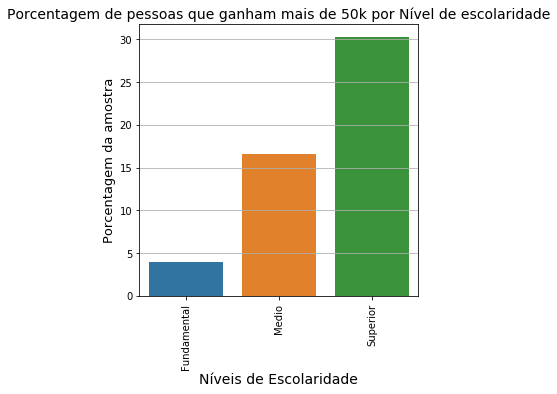

In [38]:
#Representando graficamente a relação entre o nível de escolaridade da amostra com salário anual de mais de 50k
plt.subplots(figsize = (5,5))
plt.grid()
plt.xticks(rotation=90)
g = sns.barplot(x=faixas_esc, y=percents)
plt.title("Porcentagem de pessoas que ganham mais de 50k por Nível de escolaridade", fontsize=14)
plt.xlabel('Níveis de Escolaridade', size = FS)
plt.ylabel('Porcentagem da amostra', size = 13) 


# Relação Horas Trabalhadas por Semana/Salário 
### Essa relação foi pensada para investigar como o valor de horas trabalhadas se distribuia em relação ao salário anual.

In [39]:
#Verificando a coluna horas feitas por semana e armazenando na variável horas_semanal
horas_semanal = wg_data['hours_per_week']
print(horas_semanal)

0        13
1        40
2        40
3        40
4        40
         ..
32555    38
32556    40
32557    40
32558    20
32559    40
Name: hours_per_week, Length: 32560, dtype: int64


In [40]:
# Total de pessoas em cada valor de horas semanais trabalhadas
wg_data.hours_per_week.value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

In [41]:
#Verificando a coluna salário anual
salario = wg_data['yearly_wage']
print(salario)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: yearly_wage, Length: 32560, dtype: object


In [42]:
# Separando as horas trabalhadas por cada categoria de salário
horas_mais50 = wg_data[wg_data['yearly_wage'].str.strip() == '>50K']['hours_per_week'].unique()
horas_menos50 = wg_data[wg_data['yearly_wage'].str.strip() == '<=50K']['hours_per_week'].unique()
#print(horas_mais50)
#print(horas_menos50)
# Para cada ocupacao, número de pessoas de cada categoria de salário 
horas_sal_group = wg_data.groupby(['hours_per_week'])['yearly_wage'].value_counts() 
horas = wg_data['hours_per_week'].unique()
#display(horas_sal_group)
#print(horas_sal_group[ [(45, ' >50K')][0]])

mais_50 = []
menos_50 = [] 
a = 1 
for i in horas:
    if i in (horas_mais50):
        mais_50.append(horas_sal_group[[(i, ' >50K')][0]])
    if i in(horas_menos50):
        menos_50.append(horas_sal_group[[(i, ' <=50K')][0]])

#print(mais_50)
#print(menos_50)

Text(0, 0.5, 'Nº de Pessoas(Escala Log)')

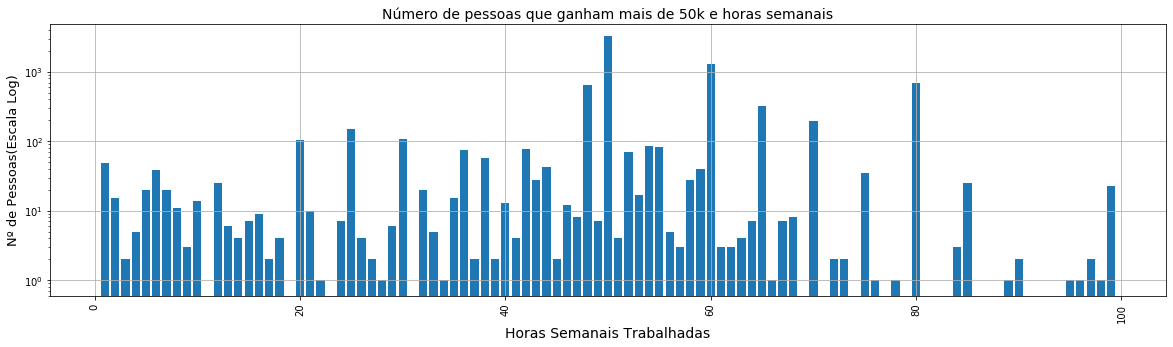

In [43]:
#Representando graficamente o número de pessoas por horas semanais realizadas que ganham mais de 50k
plt.subplots(figsize = (20,5))
plt.grid()
plt.yscale('log')
plt.xticks(rotation=90)
g = plt.bar(horas_mais50, mais_50)
plt.title("Número de pessoas que ganham mais de 50k e horas semanais", fontsize=14)
plt.xlabel('Horas Semanais Trabalhadas', size = FS)
plt.ylabel('Nº de Pessoas(Escala Log)', size = 13) 


Text(0, 0.5, 'Nº de Pessoas')

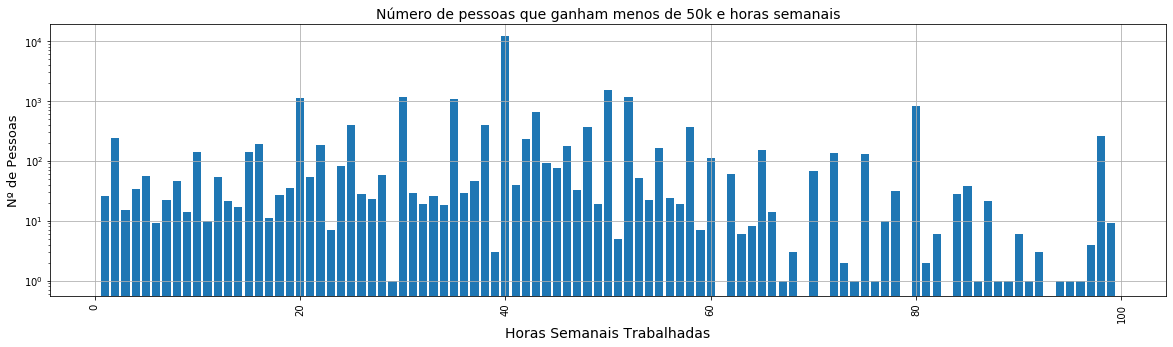

In [44]:
#Representando graficamente o número de pessoas por horas semanais realizadas que ganham menos de 50k
plt.subplots(figsize = (20,5))
plt.grid()
plt.yscale('log')
plt.xticks(rotation=90)
g = plt.bar(horas_menos50, menos_50)
plt.title("Número de pessoas que ganham menos de 50k e horas semanais", fontsize=14)
plt.xlabel('Horas Semanais Trabalhadas', size = FS)
plt.ylabel('Nº de Pessoas', size = 13) 

## Relação sexo/salário
### Essa relação foi pensanda para analisar a distribuição de homens e mulheres que ganham mais de 50k

In [45]:
#Armazenando a coluna 'sex' na variável sexo 
sexo = wg_data['sex']
print(sexo)

0          Male
1          Male
2          Male
3        Female
4        Female
          ...  
32555    Female
32556      Male
32557    Female
32558      Male
32559    Female
Name: sex, Length: 32560, dtype: object


In [46]:
#Verificando e contando o número de pessoas por categoria  
wg_data.sex.value_counts()

Male      21789
Female    10771
Name: sex, dtype: int64

In [47]:
# Para cada sexo, número de pessoas de cada categoria de salário
sexo_group = wg_data.groupby(['sex'])['yearly_wage'].value_counts()
print(sexo_group)

sex     yearly_wage
Female   <=50K          9592
         >50K           1179
Male     <=50K         15127
         >50K           6662
Name: yearly_wage, dtype: int64


In [48]:
# Calculando o percentual de pessoas por sexo que ganham mais de 50k
percent_female = (1179./(1179+6662.))*100
percent_male = (6662./(6662+1179.))*100
percents = [percent_female, percent_male]
sexos = ['Mulheres', 'Homens']

Text(0, 0.5, 'Percentual de Pessoas')

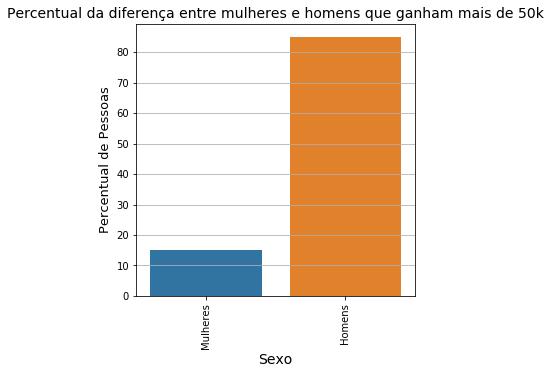

In [49]:
#Representando graficamente a distribuição de homens e mulherees que ganham mais de 50k
plt.subplots(figsize = (5,5))
plt.grid()
plt.xticks(rotation=90)
g = sns.barplot(x=sexos, y=percents)
plt.title("Percentual da diferença entre mulheres e homens que ganham mais de 50k", fontsize=14)
plt.xlabel('Sexo', size = FS)
plt.ylabel('Percentual de Pessoas', size = 13) 


## Relação  Raça/Salário
### Essa relação foi pensada para analisar a distribuição da raça das pessoas na amostra em relação ao salário anual maior que 50k 
    

In [50]:
#Verificando a coluna raça e armazenando na variável etnia
etnia = wg_data['race']
print(etnia)

0        White
1        White
2        Black
3        Black
4        White
         ...  
32555    White
32556    White
32557    White
32558    White
32559    White
Name: race, Length: 32560, dtype: object


In [51]:
#Contando o número de pessoas por categoria 
wg_data.race.value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [52]:
#Agrupando o número de pessoas por raça com os valores de salário anuais
race_group = wg_data.groupby(['race'])['yearly_wage'].value_counts()
print(race_group)

race                yearly_wage
Amer-Indian-Eskimo   <=50K           275
                     >50K             36
Asian-Pac-Islander   <=50K           763
                     >50K            276
Black                <=50K          2737
                     >50K            387
Other                <=50K           246
                     >50K             25
White                <=50K         20698
                     >50K           7117
Name: yearly_wage, dtype: int64


In [53]:
# Calculando o percentual de pessoas que ganham mais de 50k por raça
percent_white = 100*7117/27815
percent_black = 100*387/3124
percent_asian_pac_islander = 100*276/1039
percent_amer_indian_eskimo = 100*36/311
percent_other = 100*25/271
percentuais = [percent_white, percent_black, percent_asian_pac_islander, percent_amer_indian_eskimo, percent_other]
etnias = ['White', 'Black', 'Asian-Pac-Islander','Black', 'Other']


#print(percentuais)
#print(etnias)

Text(0, 0.5, 'Percentual de Pessoas')

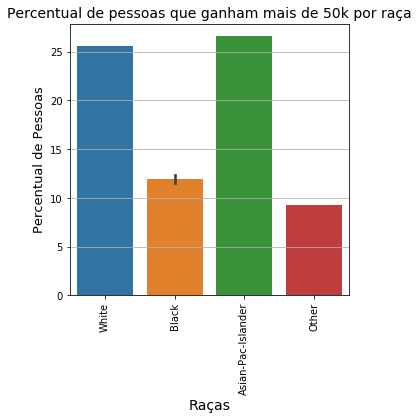

In [54]:
#Representando graficamente a distrbuição raça/salário anual
plt.subplots(figsize = (5,5))
plt.grid()
plt.xticks(rotation=90)
g = sns.barplot(x=etnias, y=percentuais)
plt.title("Percentual de pessoas que ganham mais de 50k por raça", fontsize=14)
plt.xlabel('Raças', size = FS)
plt.ylabel('Percentual de Pessoas', size = 13) 

# Modelo de Predição

A previsão do salário a partir dos dados foram feitas através da implementação do algoritimo de aprendizado supervisionado Random Forest, utilizando as variáveis 'age','workclass', 'education', 'occupation', 'race', 'sex' e 'hours_per_week'. Optei pela seleção dessas variáveis pois pareceram ser os dados mais relevantes para prever o salário.
 
As colunas como: 'marital_status' e 'relationship' não pareciam ter grande influência sobre o salário, além de que 'relationship' apresentava dados redundantes, 'marital_status' e a coluna 'sex' são suficientes para avaliar o papel de um individuo na família. 
'Capital_gain e Capital_loss' são colunas que apresentavam dados em sua maioria zerados, então foram excluídas.
Já as colunas 'fnlwgt' e 'education_num' não eram auto explicativas e representavam pesos, eram variáveis contínuas em função das outras variáveis discretas, então para simplificar a análise, foram descartadas.
A coluna 'Native_Country' também foi excluída do treinamento e teste, pois foi visto nos dados que a maioria de pessoas são dos Estados Unidos.

Algumas das transformações feitas foram a agregação de algumas categorias dispersas em 3 categorias maiores em colunas como 'education', isso foi feito para facilicar a transformação dessas categorias em dados binários para treinar e testar o algoritimo. 

Entendi que o tipo de problema que estavámos resolvendo era do tipo de classificação, uma vez que, a coluna a ser prevista continha dados categórios: maior ou menor que 50k. Por isso foi optado pelo modelo Random Forest. 

 Explicando um pouco melhor, o Random Forest é um algoritmo de aprendizado supervisionado. Ele constrói uma floresta com um conjunto de árvores de decisão. É um algoritmo de aprendizado de máquina fácil de usar que produz um ótimo resultado na maioria das vezes, mesmo sem ajuste de hiperparâmetro.
 O algoritimo trata-se de técnicas de perturbação e combinação especificamente projetadas para árvores. Isso significa que um conjunto diversificado de classificadores é criado pela introdução de aleatoriedade na construção do classificador. A previsão do conjunto é dada como a previsão média dos classificadores individuais. Cada árvore no conjunto é construída a partir de uma amostra extraída com substituição (ou seja, uma amostra bootstrap) do conjunto de treinamento.
 Além disso, ao dividir cada nó durante a construção de uma árvore, a melhor divisão é encontrada em todos os recursos de entrada ou em um subconjunto aleatório de tamanho max_features. 
 O objetivo dessas duas fontes de aleatoriedade é diminuir a variância do estimador florestal. De fato, as árvores de decisão individuais normalmente exibem alta variância e tendem a se ajustar demais. A aleatoriedade injetada nas florestas produz árvores de decisão com erros de previsão um tanto desacoplados. Fazendo uma média dessas previsões, alguns erros podem ser cancelados. Florestas aleatórias atingem uma variação reduzida combinando diversas árvores, às vezes ao custo de um leve aumento no viés. Na prática, a redução da variância é muitas vezes significativa, resultando em um modelo geral melhor.

Prós:
- Random Forest podem ser usadas para tarefas de classificação e regressão.
- O modelo funciona bem com dados categóricos e numéricos. 
- Normalmente, nenhuma escala ou transformação de variáveis é necessária.
- Ele executa implicitamente a seleção de recursos e geram árvores de decisão não correlacionadas. Ele faz isso escolhendo um conjunto aleatório de recursos para construir cada árvore de decisão. Isso também o torna um ótimo modelo quando você precisa trabalhar com um grande número de recursos nos dados.
- As "Random Forest" não são influenciadas por valores discrepantes em um grau razoável. Ele faz isso categorizando as variáveis.
- O modelo também  lida bem com relacionamentos lineares e não lineares.
- Además, geralmente fornecem alta precisão e equilibram bem o equilíbrio entre viés e variância. Como o princípio do modelo é calcular a média dos resultados nas várias árvores de decisão que ele constrói, ele também calcula a média da variância.

Contras:
- Random Forests não são facilmente interpretáveis. Eles fornecem a importância do recurso, mas não fornecem visibilidade completa dos coeficientes como regressão linear.
- O modelo pode ser computacionalmente intensivo para grandes conjuntos de dados.
- Además, é como um algoritmo de caixa preta, você tem muito pouco controle sobre o que o modelo faz.

Fonte: https://scikit-learn.org/stable/modules/ensemble.html#forest

A medida de performance escolhida foi a acurácia porque se trata de um problema de clássico de classificação, e a acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente. 


## Funções de Preparação dos Dados e de divisão dos conjuntos de entrada e saida

In [74]:
#Selecionando e codificando as colunas que serão utilizadas
def prepareData(df):
    df = df[['age','workclass', 'education', 'occupation', 'race', 'sex', 'hours_per_week', 'yearly_wage']]
    df_num =  pd.DataFrame(columns=['age','workclass', 'education', 'occupation', 'race', 'sex', 'hours_per_week', 'yearly_wage'])
    df_num = pd.get_dummies(data = df,
        columns = ['workclass', 'education', 'occupation', 'race', 'sex'],
        prefix = ['workclass', 'education', 'occupation', 'race', 'sex'] 
    )
    return df_num

In [75]:
#Divindo a entrada e saída para o modelo
def dataSplit(df):

    y = np.asarray(list(df['yearly_wage'].str.strip()))
    X = df.drop('yearly_wage', axis=1)

    y_bin = [1 if value == ">50K" else 0 for value in y]

    return X, np.asarray(y_bin)

In [76]:
#Aplicando as funções
wg_data_num = prepareData(wg_data)

X, y = dataSplit(wg_data_num)
print(X.shape, y.shape)

(32560, 32) (32560,)


## Treinamento do Modelo usando KFold para divisão dos conjuntos de Treino e Validação

In [77]:
#Importando as bibliotecas do modelo e métricas de performances
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

#Treinamento do modelo
mean_acc=0
kf = KFold(n_splits=10)
kf.get_n_splits(X)
clf = RandomForestClassifier(max_features= "sqrt",  random_state=3232)
bestModel = None
bestAcc = 0
i = 0
for train_index, val_index in kf.split(X):
    i += 1
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_val)
    acc = (100*accuracy_score(y_val, predictions))
    print("Fold: %i" % i  + " - Accuracy: %s%%" % acc)
    if acc > bestAcc:
        bestModel = clf
        bestAcc = acc
    mean_acc += acc
    #print(classification_report(y_val, predictions))
print("Acuracia Média: %s%%" % (mean_acc/i))
print("Melhor Acuracia %s%%" % bestAcc)

Fold: 1 - Accuracy: 76.5970515970516%
Fold: 2 - Accuracy: 77.33415233415234%
Fold: 3 - Accuracy: 77.94840294840296%
Fold: 4 - Accuracy: 77.85626535626535%
Fold: 5 - Accuracy: 78.992628992629%
Fold: 6 - Accuracy: 78.16339066339066%
Fold: 7 - Accuracy: 78.07125307125307%
Fold: 8 - Accuracy: 78.4090909090909%
Fold: 9 - Accuracy: 78.50122850122851%
Fold: 10 - Accuracy: 77.85626535626535%
Acuracia Média: 77.97297297297297%
Melhor Acuracia 78.992628992629%


## Tratamento do Conjunto de Testes

In [70]:
#Importando o dataset de teste
wg_data_test = pd.read_csv('wage_test.csv')
wg_data_test

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16276,16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
16277,16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16278,16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [78]:
#Trocando os valores ausentes por valores nulos
for col in wg_data_test.columns:
    for idx, row in enumerate(wg_data_test[col]):
        if str.strip(str(row)) == '?':
            wg_data_test.loc[idx, col] = 'Unknown'
#Excluindo os valores nulos
#wg_data = wg_data.dropna()

In [79]:
wg_data_test

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,Medio,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Gov_Workers,336951,Superior,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Superior,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,Unknown,103497,Superior,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,Medio,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,39,Private,215419,Superior,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16276,16276,64,Unknown,321403,Medio,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States
16277,16277,38,Private,374983,Superior,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16278,16278,44,Private,83891,Superior,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [80]:
#Criando novas categorias para algumas colunas com valores categóricos
wg_data_test['occupation'] = wg_data_test['occupation'].str.strip()
wg_data_test['race'] = wg_data_test['race'].str.strip()
wg_data_test['sex'] = wg_data_test['sex'].str.strip()
wg_data_test['workclass'] = wg_data_test['workclass'].str.strip()
wg_data_test['workclass'] = wg_data_test['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Gov_Workers')
wg_data_test['workclass'] = wg_data_test['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self_Emp')
wg_data_test['workclass'] = wg_data_test['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')
wg_data_test['education'] = wg_data_test['education'].str.strip()
wg_data_test['education'] = wg_data_test['education'].replace(['1st-4th', '5th-6th', '7th-8th', 'Preschool'], 'Fundamental')
wg_data_test['education'] = wg_data_test['education'].replace(['HS-grad', '9th', '10th', '11th', '12th', 'Prof-school'], 'Medio')
wg_data_test['education'] = wg_data_test['education'].replace(['Assoc-acdm', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Assoc-voc'], 'Superior')

In [81]:
wg_data_test

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,Medio,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Gov_Workers,336951,Superior,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Superior,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,Unknown,103497,Superior,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,Medio,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,39,Private,215419,Superior,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16276,16276,64,Unknown,321403,Medio,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States
16277,16277,38,Private,374983,Superior,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16278,16278,44,Private,83891,Superior,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [82]:
#Função para selecionar e codificar as colunas categóricas
def prepareDataTest(df):
    df = df[['age','workclass', 'education', 'occupation', 'race', 'sex', 'hours_per_week']]
    df_num =  pd.DataFrame(columns=['age','workclass', 'education', 'occupation', 'race', 'sex', 'hours_per_week'])
    df_num = pd.get_dummies(data = df,
        columns = ['workclass', 'education', 'occupation', 'race', 'sex'],
        prefix = ['workclass', 'education', 'occupation', 'race', 'sex'] 
    )
    return df_num

X_test = prepareDataTest(wg_data_test)
X_test

,age,hours_per_week,workclass_Gov_Workers,workclass_Private,workclass_Self_Emp,workclass_Unemployed,workclass_Unknown,education_Fundamental,education_Medio,education_Superior,...,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,38,50,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,28,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,44,40,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,18,30,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,34,30,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,36,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
16276,64,40,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
16277,38,50,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
16278,44,40,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Predição do Conjunto de Testes

In [83]:
#Usando o melhor modelo para predição
predictions_test = bestModel.predict(X_test)

In [84]:
# Transformando os valores binários preditos para as categorias de Salário
predicted_wages = [" <=50K" if x == 0 else " >50K" for x in predictions_test]
wg_data_test['predictedValues'] = predicted_wages

In [68]:
# Gerando o Dataset Final e salvando no arquivo csv
df_result = wg_data_test['predictedValues']
df_result.to_csv('predicted.csv')

<ipython-input-68-2a41f39ab47a>:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  df_result.to_csv('predicted.csv')
